# Load packages and define useful functions

In [1]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryModels import SummaryModels
import pandas as pd

# Look at the default setup
Use the VRNN model, 100 dimensional latent and recurrent laten space, and no batch normalization, scheduler, or KL annealing. Showing results for fishing vessels

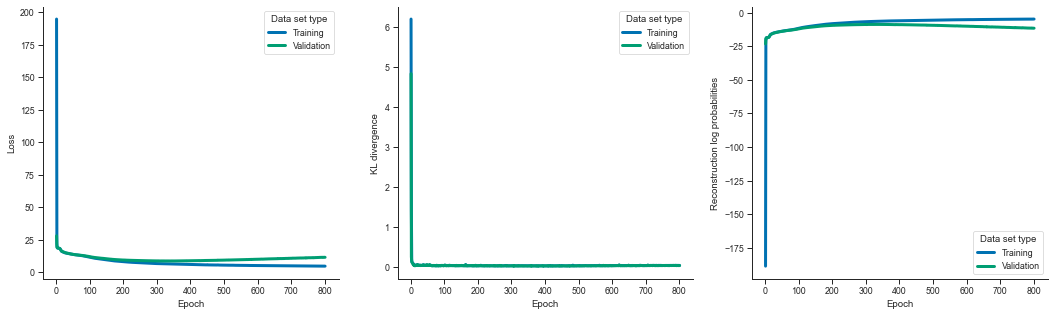

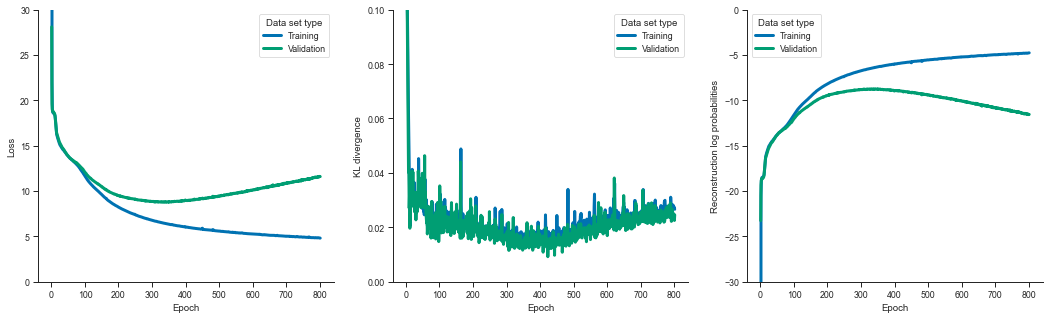

In [2]:
# Use the SummaryModels class
file_name = "RegionBornholm_01062019_30092019_Fish_14400_86400_600"
ylims = [(0, 30), (0, 0.1), (-30, 0)]
summary_models = SummaryModels(file_name)
df_default = summary_models.load_curves_df("Default")
summary_models.plot_curves(df_default)
summary_models.plot_curves(df_default, ylims=ylims)

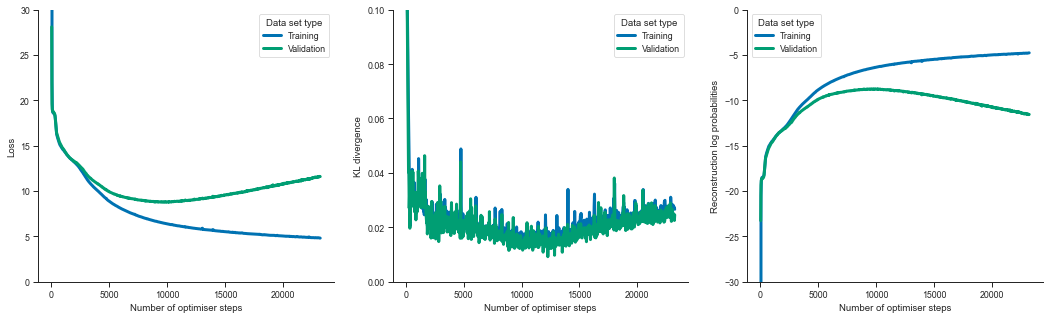

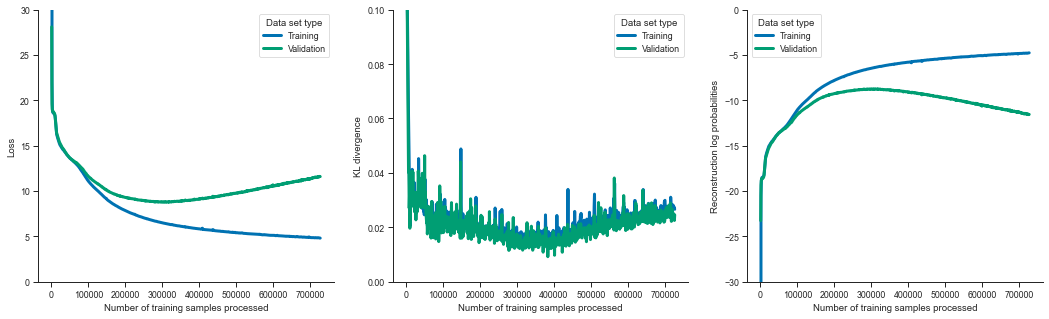

In [3]:
# Plot the same things as above, but with optimizer steps and number of processed training samples on the x-axis
summary_models.plot_curves(summary_models.load_curves_df("Default", level="Step"), x="Number of optimiser steps", ylims=ylims)
summary_models.plot_curves(summary_models.load_curves_df("Default", level="Sample"), x="Number of training samples processed", ylims=ylims)

#  Add Scheduler

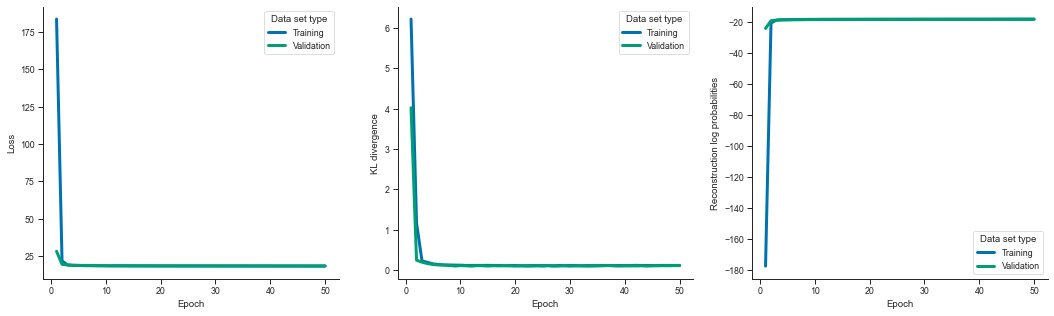

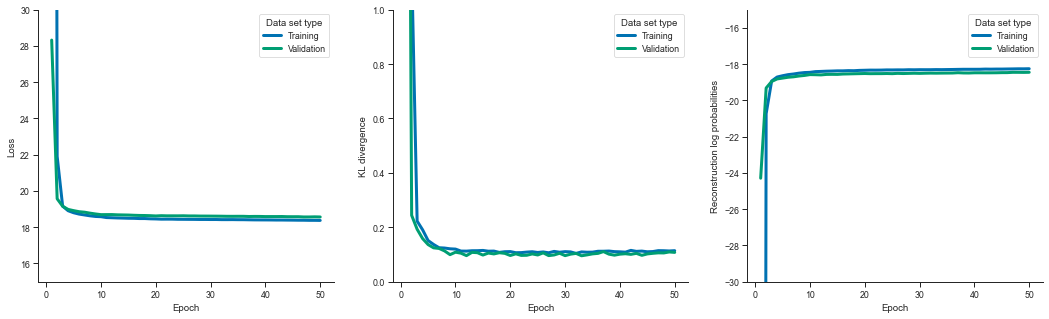

In [3]:
summary_models = SummaryModels(file_name, scheduler=True)
df_scheduler = summary_models.load_curves_df("Scheduler")
summary_models.plot_curves(df_scheduler)
summary_models.plot_curves(df_scheduler, ylims=[(15, 30), (0, 1), (-30, -15)])

#  Annealed Kullback–Leibler 

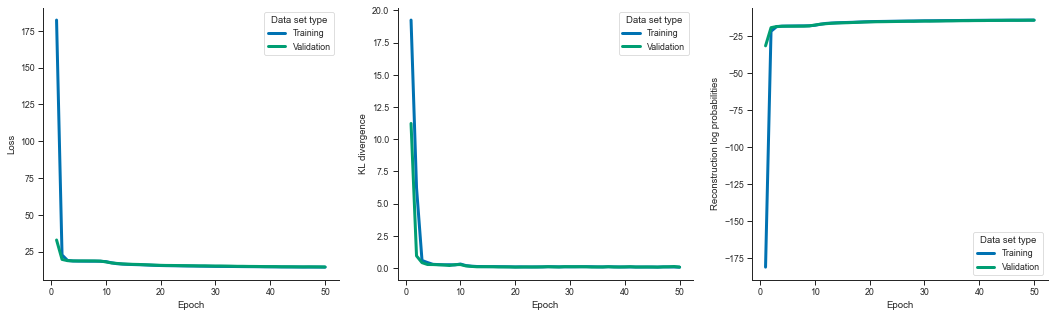

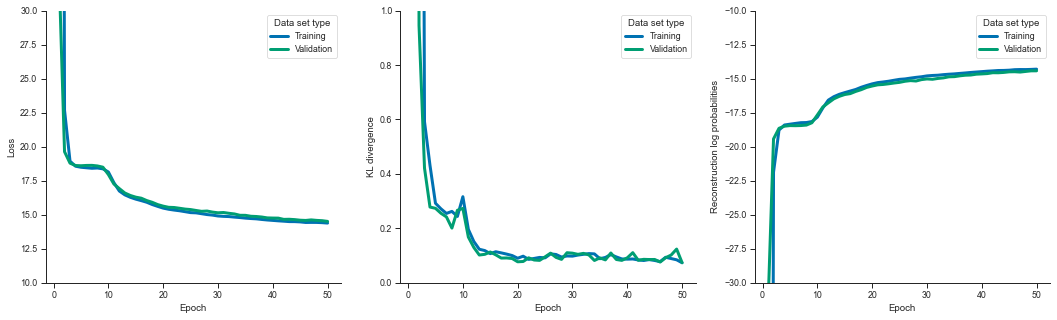

In [4]:
summary_models = SummaryModels(file_name, kl_annealing=True)
df_annealing = summary_models.load_curves_df("Annealing")
summary_models.plot_curves(df_annealing)
summary_models.plot_curves(df_annealing, ylims=[(10, 30), (0, 1), (-30, -10)])

# Scheduler & Annealed Kullback–Leibler 

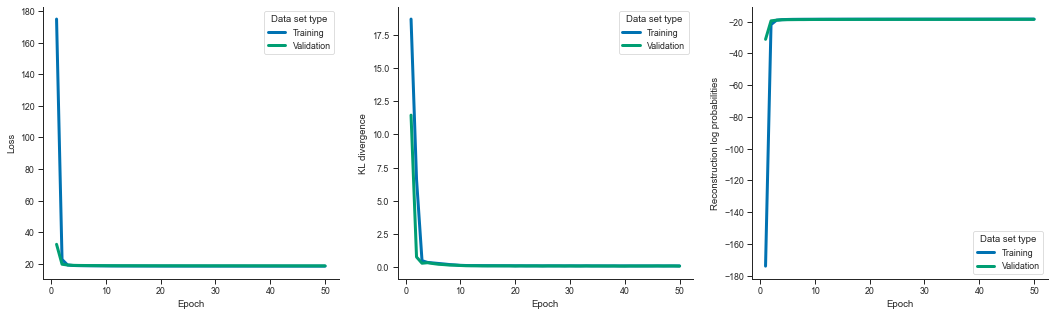

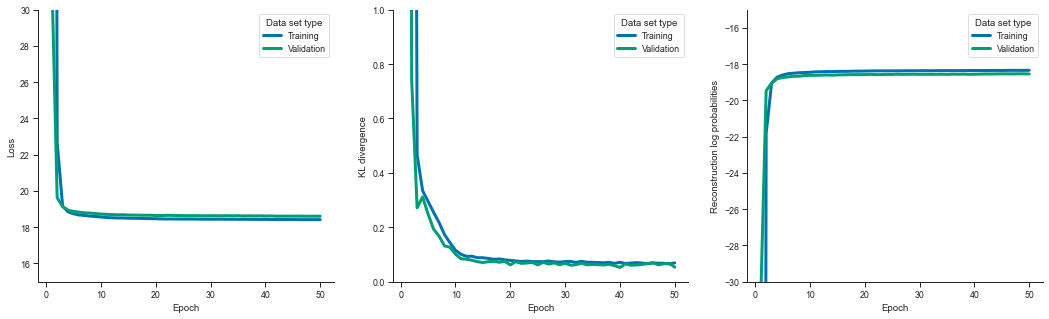

In [5]:
summary_models = SummaryModels(file_name, scheduler=True, kl_annealing=True)
df_scheduler_annealing = summary_models.load_curves_df("Scheduler_Annealing")
summary_models.plot_curves(df_scheduler_annealing)
summary_models.plot_curves(df_scheduler_annealing, ylims=[(15, 30), (0, 1), (-30, -15)])

# Different settings with no batch normalization

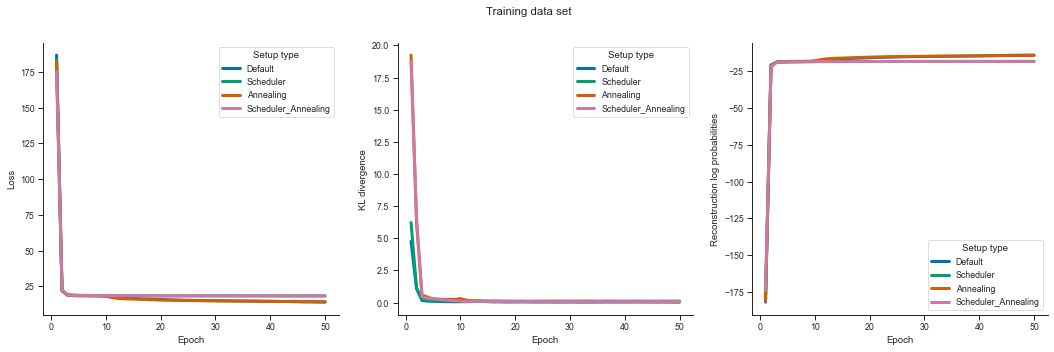

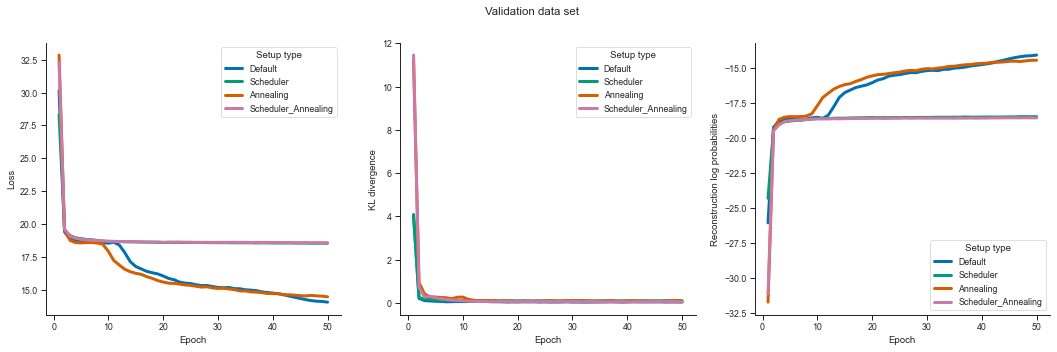

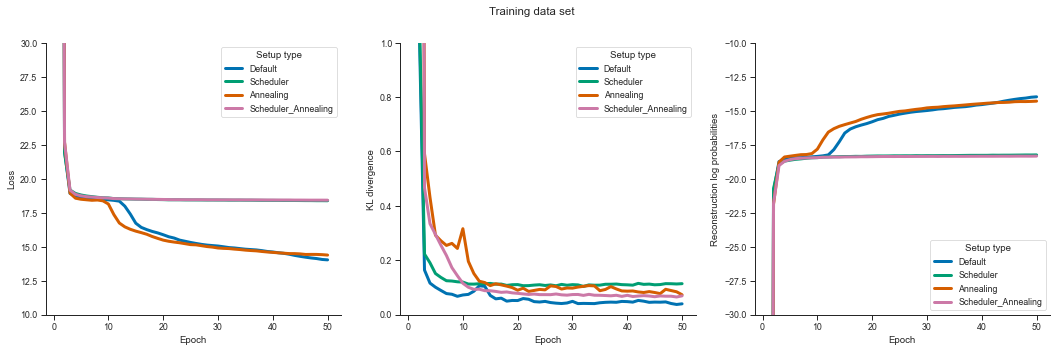

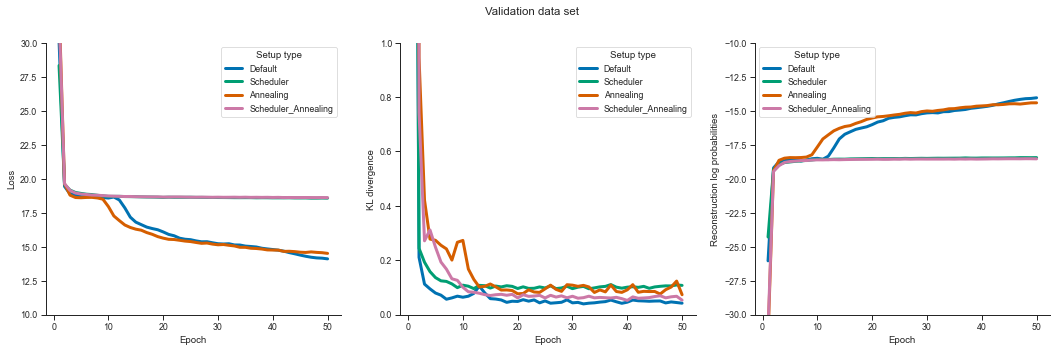

In [6]:
df = pd.concat([df_default, df_scheduler, df_annealing, df_scheduler_annealing])
df.reset_index(drop=True, inplace=True)
hue = "Setup type"
hue_order = ["Default", "Scheduler", "Annealing", "Scheduler_Annealing"]
summary_models.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set")
summary_models.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set")
summary_models.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set",
                           ylims=[(10, 30), (0, 1), (-30, -10)])
summary_models.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set",
                           ylims=[(10, 30), (0, 1), (-30, -10)])

# Use batch normalization
Use the VRNN model, 100 dimensional latent and recurrent laten space, batch normalization, but no scheduler or KL annealing. Showing results for fishing vessels

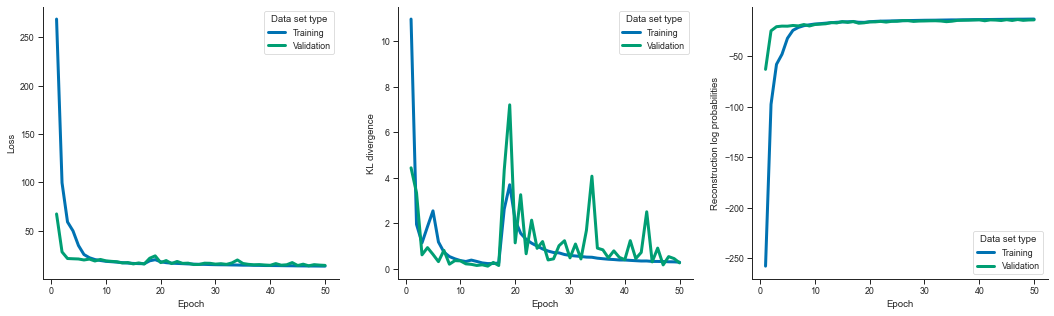

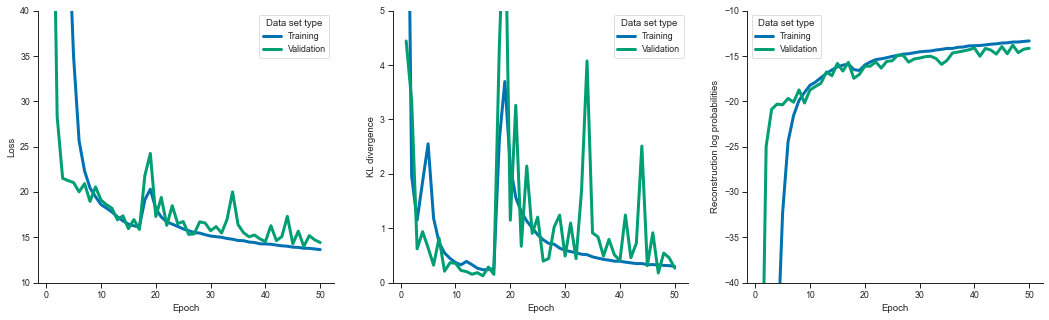

In [7]:
summary_models = SummaryModels(file_name, batch_norm=True)
df_batch_norm = summary_models.load_curves_df("Batch_Norm")
summary_models.plot_curves(df_batch_norm)
summary_models.plot_curves(df_batch_norm, ylims=[(10, 40), (0, 5), (-40, -10)])

# Batch normalization & Scheduler

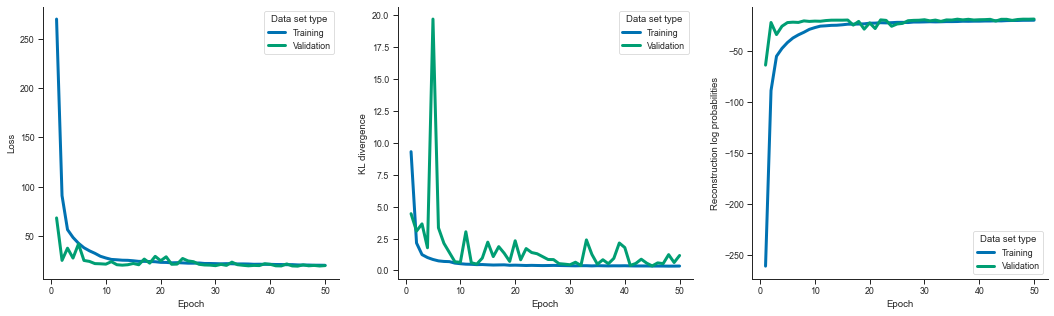

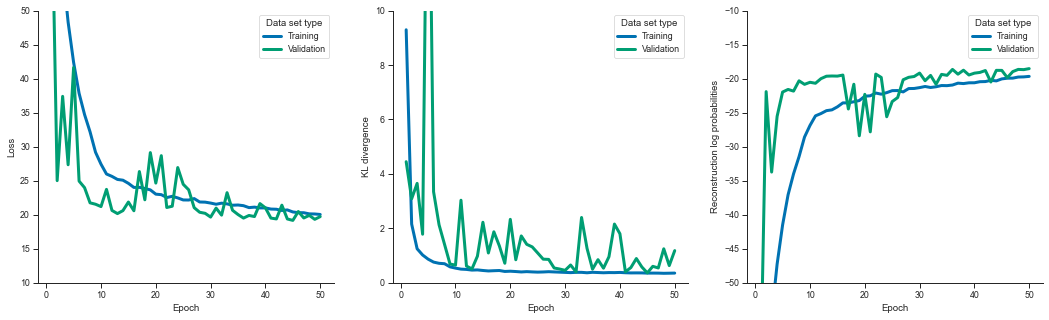

In [8]:
summary_models = SummaryModels(file_name, batch_norm=True, scheduler=True)
df_batch_norm_scheduler = summary_models.load_curves_df("Batch_Norm_Scheduler")
summary_models.plot_curves(df_batch_norm_scheduler)
summary_models.plot_curves(df_batch_norm_scheduler, ylims=[(10, 50), (0, 10), (-50, -10)])

#  Batch normalization & Annealed Kullback–Leibler 

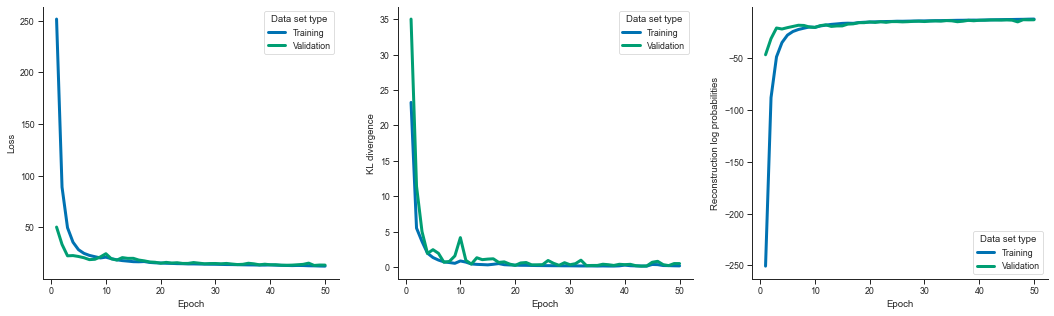

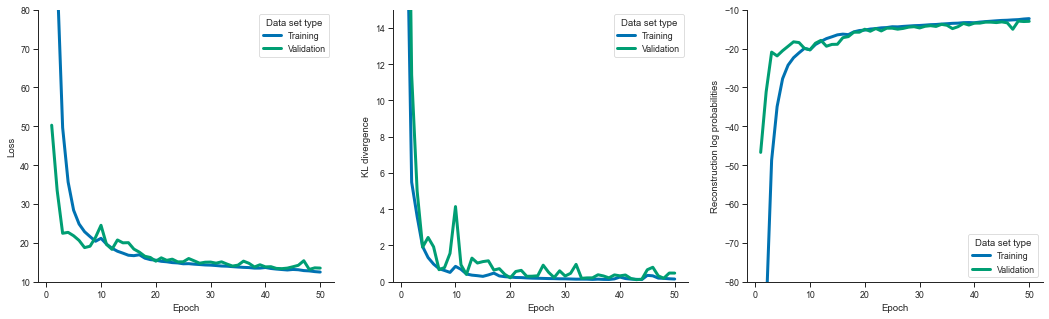

In [9]:
summary_models = SummaryModels(file_name, batch_norm=True, kl_annealing=True)
df_batch_norm_annealing = summary_models.load_curves_df("Batch_Norm_Annealing")
summary_models.plot_curves(df_batch_norm_annealing)
summary_models.plot_curves(df_batch_norm_annealing, ylims=[(10, 80), (0, 15), (-80, -10)])

#  Batch normalization & Annealed Kullback–Leibler & Scheduler

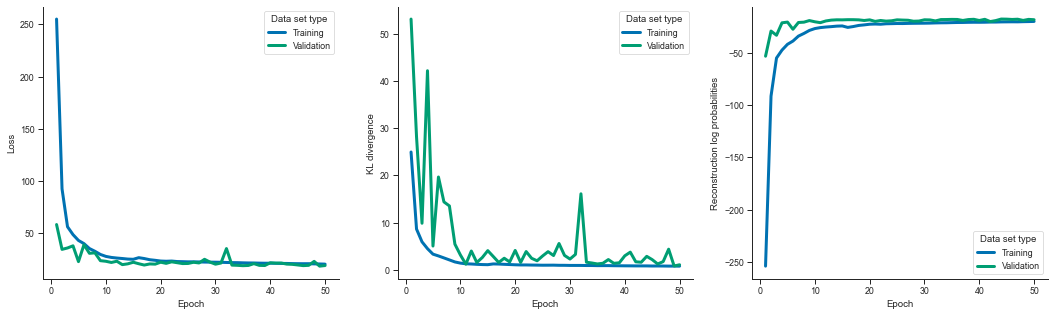

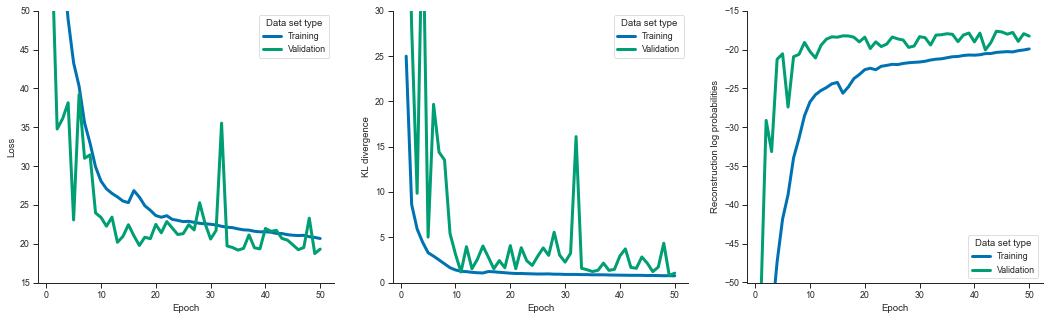

In [10]:
summary_models = SummaryModels(file_name, batch_norm=True, scheduler=True, kl_annealing=True)
df_batch_norm_scheduler_annealing = summary_models.load_curves_df("Batch_Norm_Scheduler_Annealing")
summary_models.plot_curves(df_batch_norm_scheduler_annealing)
summary_models.plot_curves(df_batch_norm_scheduler_annealing, ylims=[(15, 50), (0, 30), (-50, -15)])

# Different settings with batch normalization

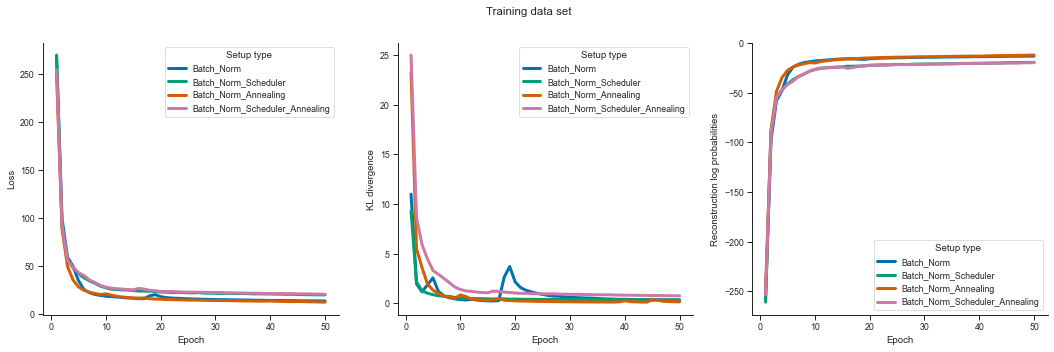

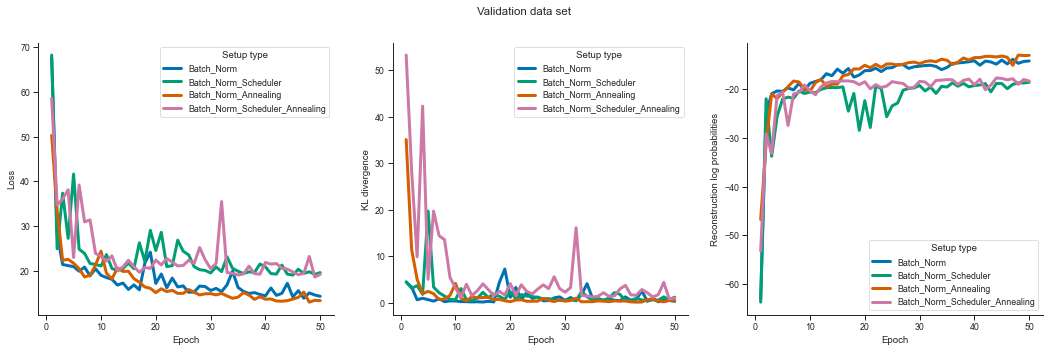

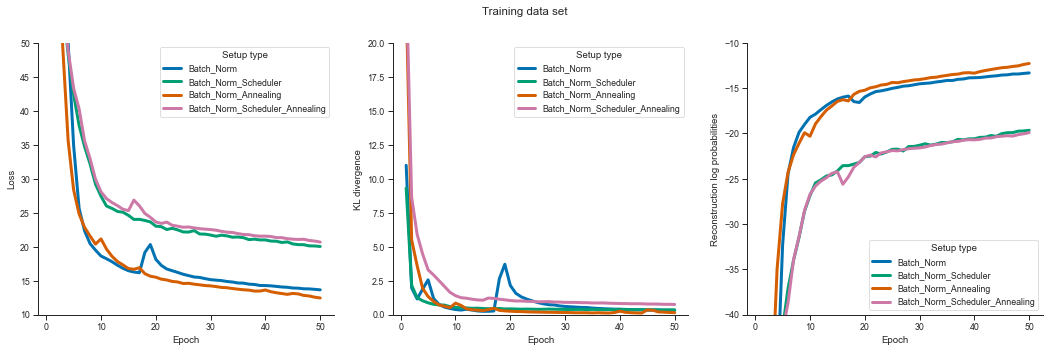

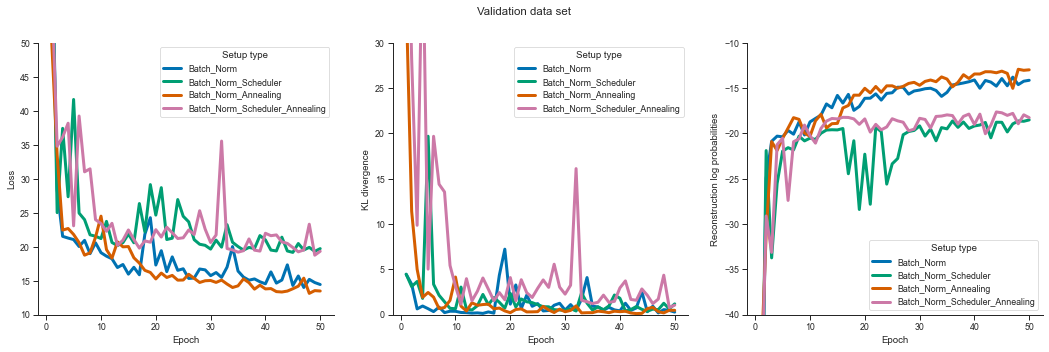

In [11]:
df = pd.concat([df_batch_norm, df_batch_norm_scheduler, df_batch_norm_annealing, df_batch_norm_scheduler_annealing])
df.reset_index(drop=True, inplace=True)
hue_order = ["Batch_Norm", "Batch_Norm_Scheduler", "Batch_Norm_Annealing", "Batch_Norm_Scheduler_Annealing"]
summary_models.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set")
summary_models.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set")
summary_models.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set",
                           ylims=[(10, 50), (0, 20), (-40, -10)])
summary_models.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set",
                           ylims=[(10, 50), (0, 30), (-40, -10)])

# Best setups (so far)

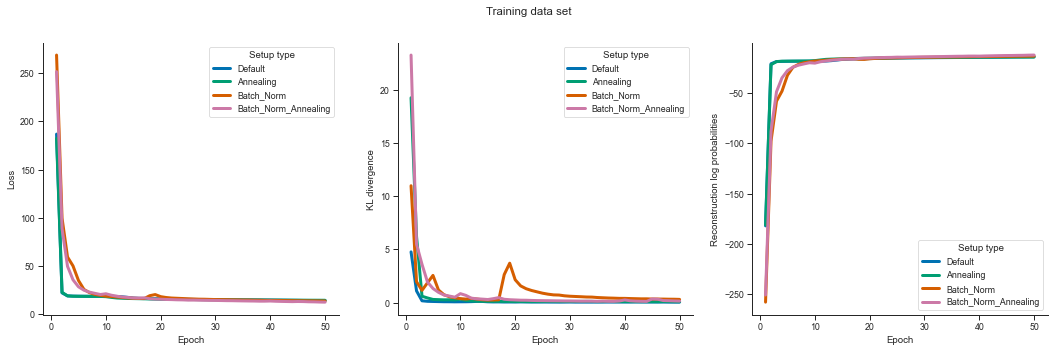

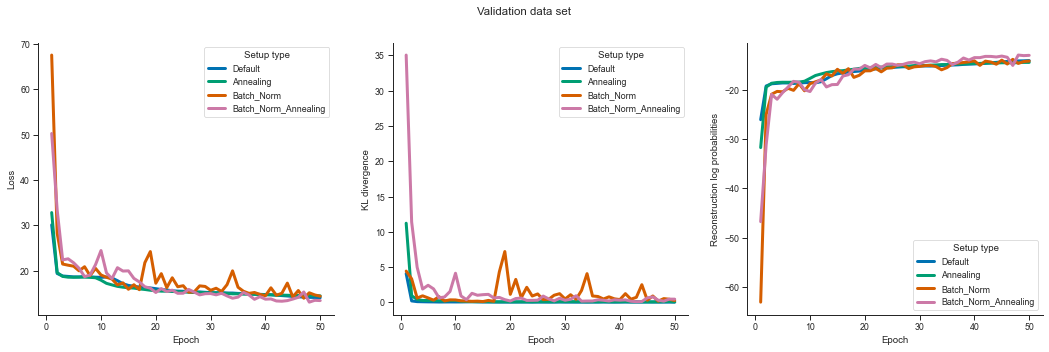

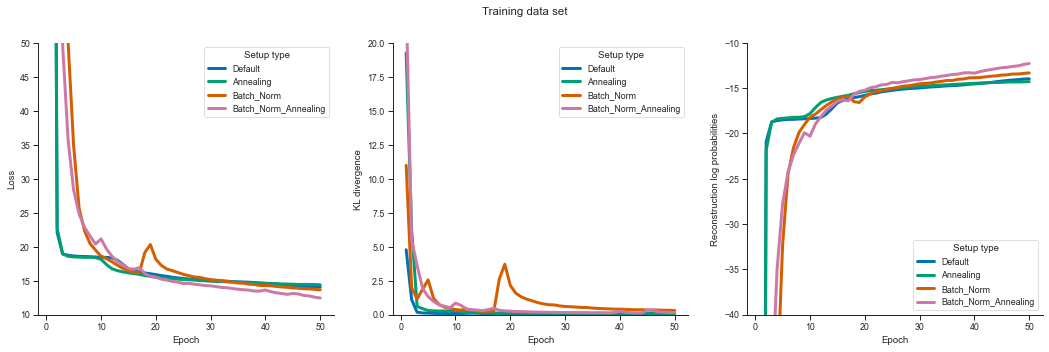

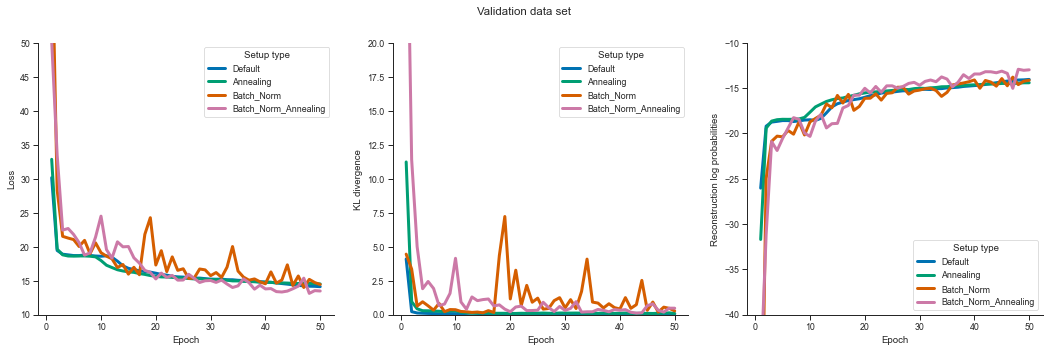

In [12]:
df = pd.concat([df_default, df_annealing, df_batch_norm, df_batch_norm_annealing])
df.reset_index(drop=True, inplace=True)
hue = "Setup type"
hue_order = ["Default", "Annealing", "Batch_Norm", "Batch_Norm_Annealing"]
summary_models.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set")
summary_models.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set")
summary_models.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set",
                           ylims=[(10, 50), (0, 20), (-40, -10)])
summary_models.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set",
                           ylims=[(10, 50), (0, 20), (-40, -10)])

# Trajectory based reconstruction log probabilities
Plot histograms of the validation trajectory based reconstruction log probabilities

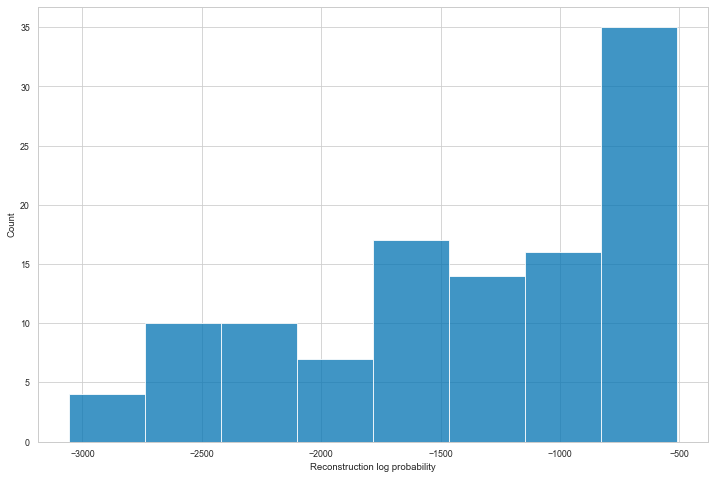

Mean Reconstruction log probability: -1402.2539842993813
Median Reconstruction log probability: -1272.313232421875
Reconstruction log probability statistics by ship type: 
           count         mean         std          min         25%  \
Ship type                                                            
Fishing    113.0 -1402.253984  678.885697 -3057.288574 -1856.62439   

                   50%        75%         max  
Ship type                                      
Fishing   -1272.313232 -804.22168 -508.111908  


In [13]:
summary_models = SummaryModels(file_name)
data = summary_models.run_evaluation()["TrajectoryLevelData"]
x = "Reconstruction log probability"

# Plot trajectory based reconstruction log probabilities
summary_models.hist_stacked_plot(data, type="Histogram", x=x, print_summary_stats=True)

# Equally weighted (point based) reconstruction log probabilities
Divide the trajectory based reconstruction log probabilities by the corresponding trajectory length and plot the same histograms as above

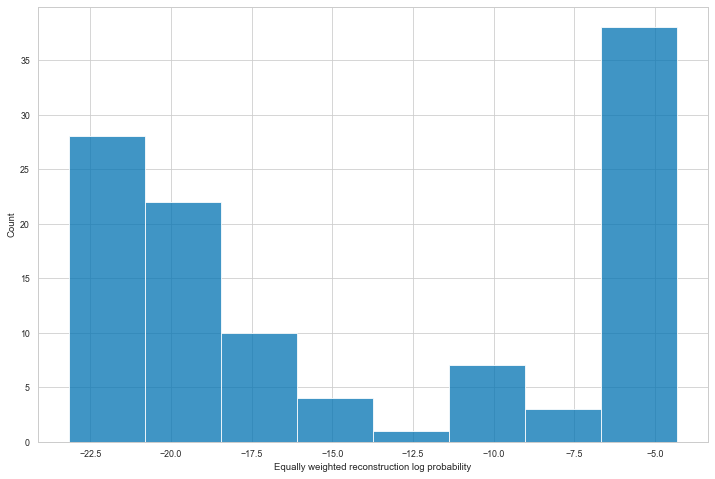

Mean Equally weighted reconstruction log probability: -14.052577706797784
Median Equally weighted reconstruction log probability: -17.6574954078311
Equally weighted reconstruction log probability statistics by ship type: 
           count       mean       std        min        25%        50%  \
Ship type                                                                
Fishing    113.0 -14.052578  6.925645 -23.174995 -20.813908 -17.657495   

                75%       max  
Ship type                      
Fishing   -6.133849 -4.309302  


In [14]:
x = "Equally weighted reconstruction log probability"
summary_models.hist_stacked_plot(data, type="Histogram", x=x, print_summary_stats=True)

In [15]:
# Look at some length statistics
data.groupby("Ship type")["Length"].describe()

,count,mean,std,min,25%,50%,75%,max
Ship type,,,,,,,,
Fishing,113.0,111.699115,34.560993,30.0,86.0,124.0,141.0,144.0


# Additional tests with learning rate

## LR=0.001

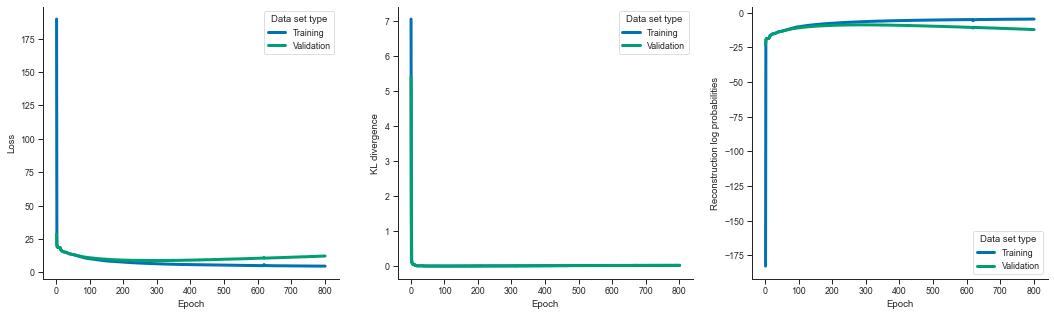

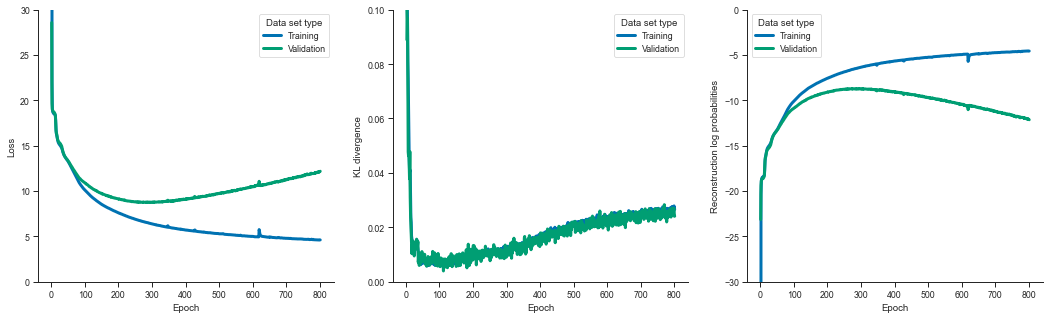

In [3]:
# Use the SummaryModels class
file_name = "RegionBornholm_01062019_30092019_Fish_14400_86400_600"
ylims = [(0, 30), (0, 0.1), (-30, 0)]
summary_models = SummaryModels(file_name)
df_0_001 = summary_models.load_curves_df("LR: 0.001")
summary_models.plot_curves(df_0_001)
summary_models.plot_curves(df_0_001, ylims=ylims)

## LR=0.0001

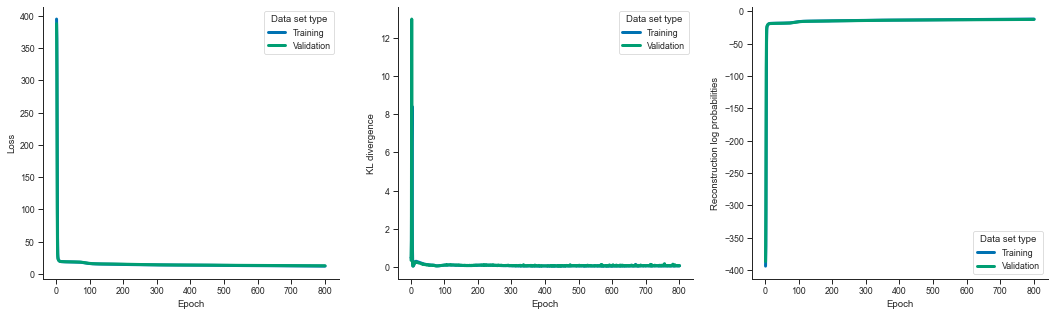

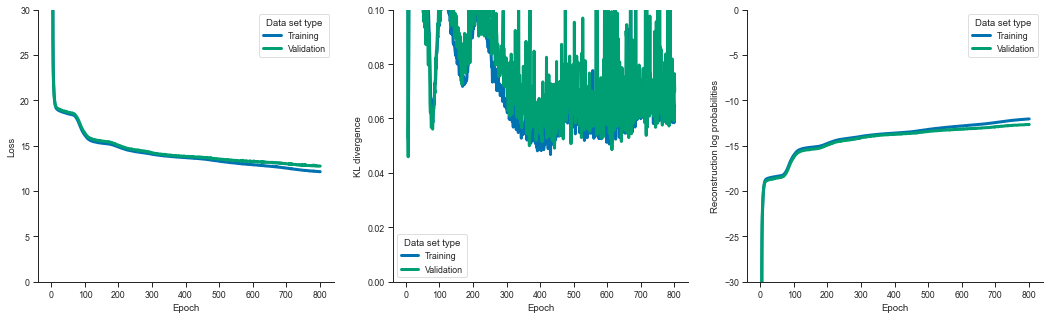

In [6]:
# Use the SummaryModels class
file_name = "RegionBornholm_01062019_30092019_Fish_14400_86400_600"
ylims = [(0, 30), (0, 0.1), (-30, 0)]
summary_models = SummaryModels(file_name, learning_rate=0.0001)
df_default_0_0001 = summary_models.load_curves_df("LR: 0.0001")
summary_models.plot_curves(df_default_0_0001)
summary_models.plot_curves(df_default_0_0001, ylims=ylims)

## LR=0.0005

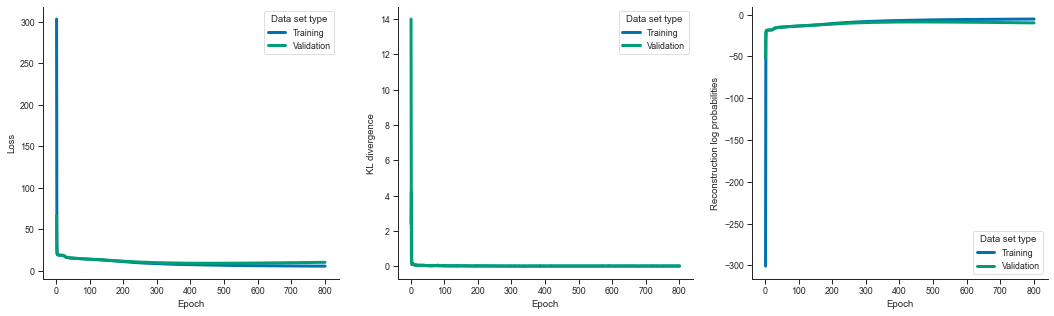

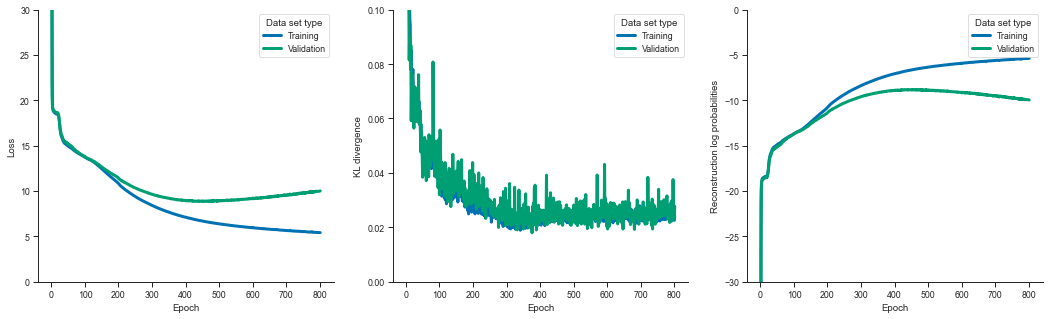

In [9]:
# Use the SummaryModels class
file_name = "RegionBornholm_01062019_30092019_Fish_14400_86400_600"
ylims = [(0, 30), (0, 0.1), (-30, 0)]
summary_models = SummaryModels(file_name, learning_rate=0.0005)
df_default_0_0005 = summary_models.load_curves_df("LR: 0.0005")
summary_models.plot_curves(df_default_0_0005)
summary_models.plot_curves(df_default_0_0005, ylims=ylims)